## `Titanic Dataset`



<img src='https://cdn.britannica.com/72/153172-050-EB2F2D95/Titanic.jpg' alt="titanic" width=600>

### `Importing (numpy, pandas, missingno, os, matplotlib, seaborn) by their standard aliases`

In [64]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import  r2_score  , accuracy_score

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.utils import  shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict



## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor      ## one for each task


### `Reading the CSV File`


In [65]:
## Read the CSV File (titanic.csv) 
df_titanic = pd.read_csv(r"D:\xxxxxxx\AI Diploma from (AI Eagles)‏\phase one\13- Project_Titanic‏\titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### `For more Information, Check the below Table`

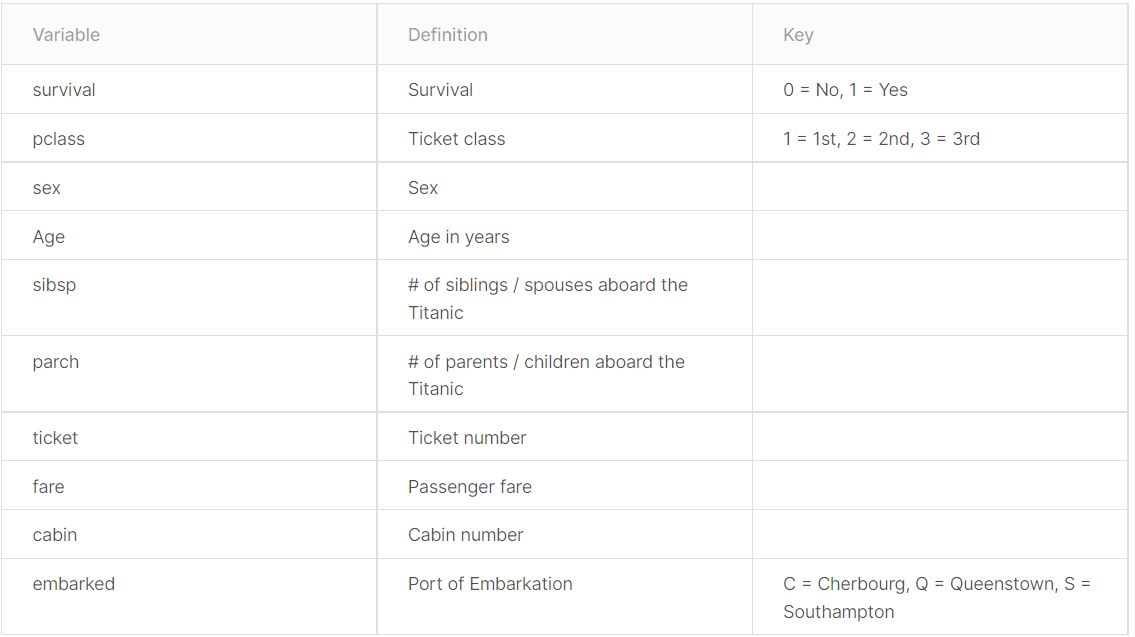

### `Checking the info and statistics of this Dataset`


In [66]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
## getting some statistics for numerical variables for this Dataset
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

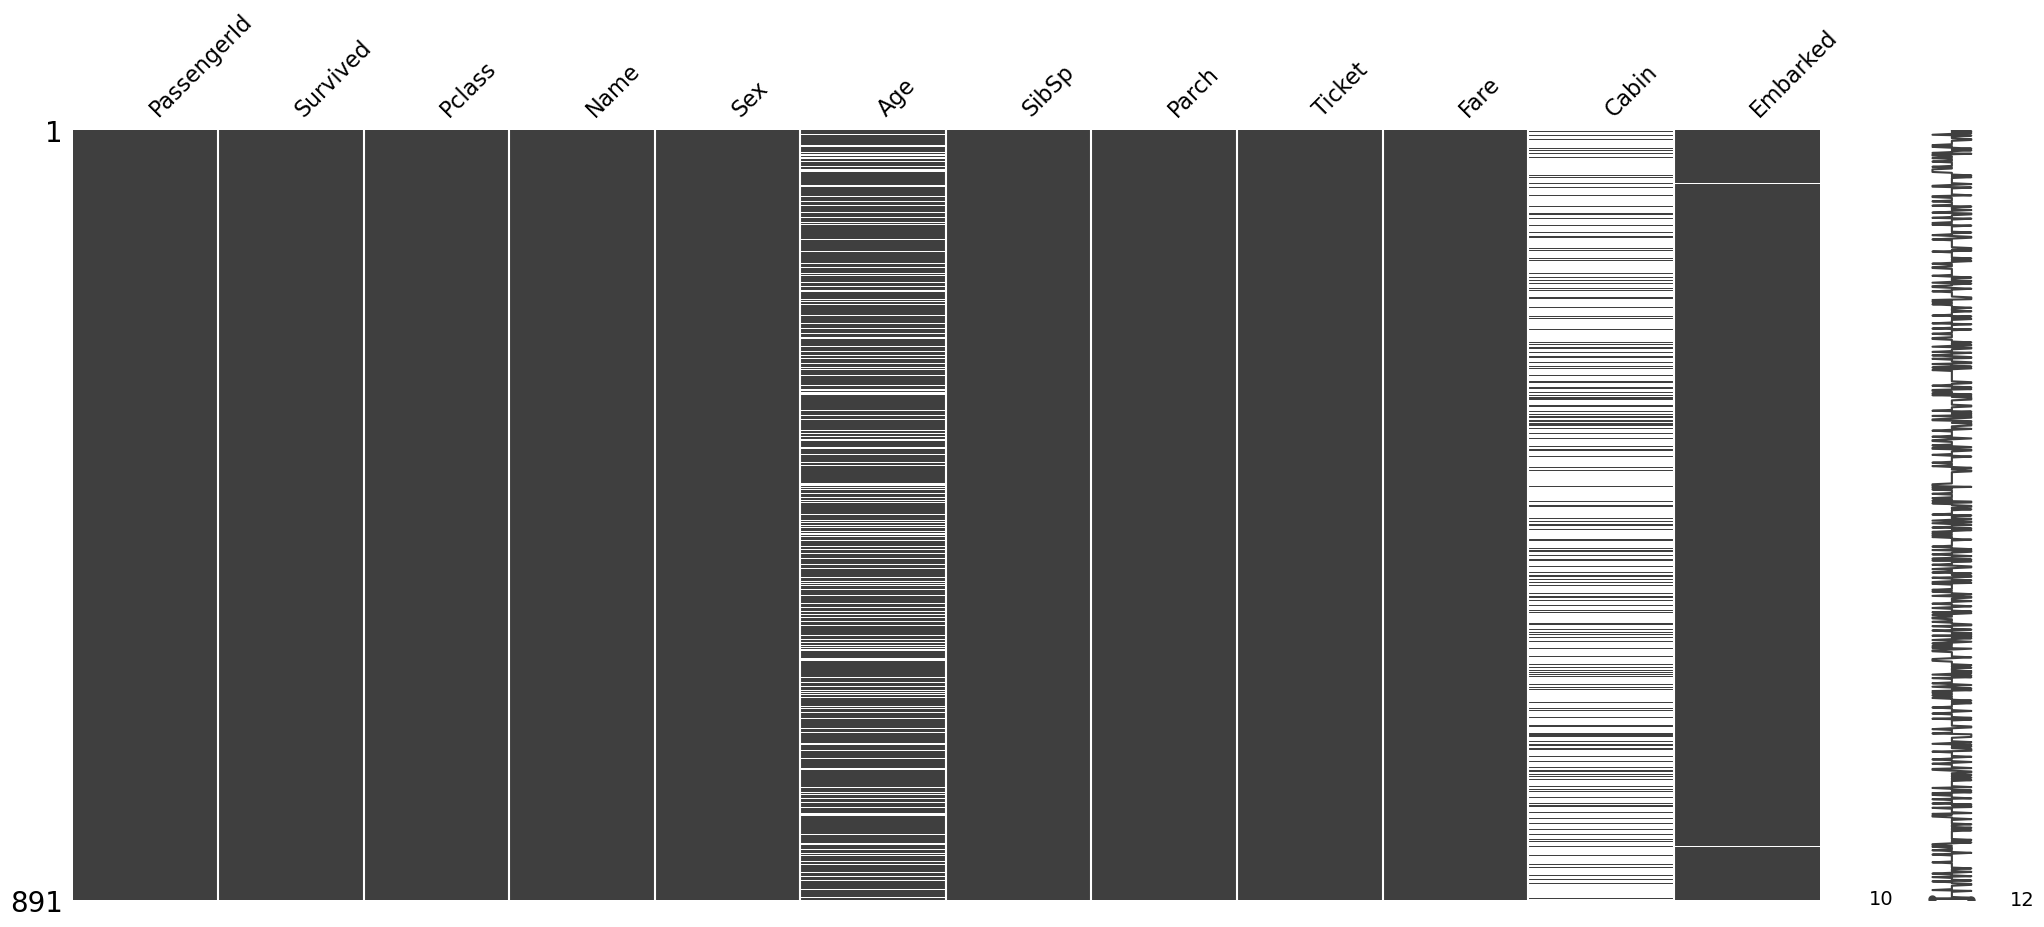

In [68]:
## useing missingno to check for nulls.
msno.matrix(df_titanic)

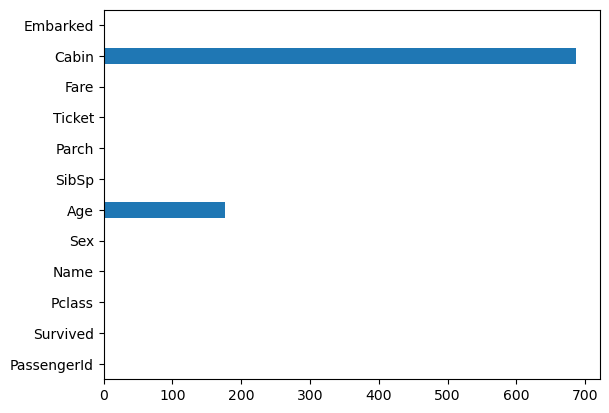

In [69]:
## Plotting the nulls as barplot 
df_titanic.isna().sum().plot(kind = 'barh')
plt.show()

### `Droping the (Cabin) Column, as it full of null values`


In [73]:
## Dropping the (Cabin) column
df_titanic.drop(columns='Cabin' , inplace = True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### `Creating a CountPlot on (Sex) Column`


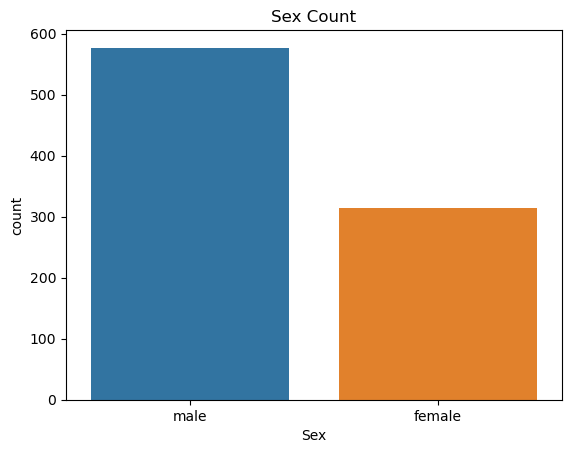

In [74]:
## Creating a countplot of (Sex) column to check the distribution of Sex in Dataset
sns.countplot(data = df_titanic , x = 'Sex')
plt.title('Sex Count');



### `Creating a CountPlot on (Survived) Column`
* `1 means yes 'survived', 0 means no 'not survived'`

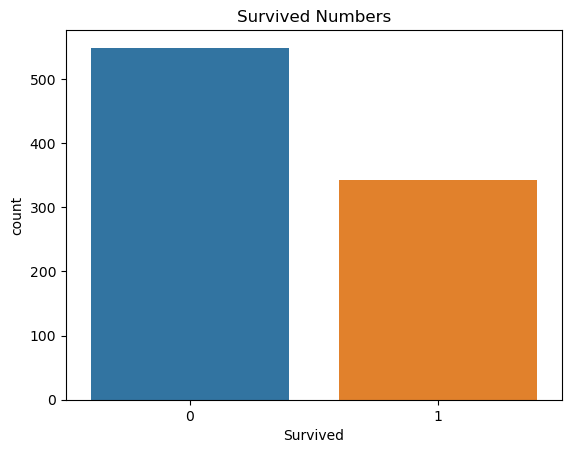

In [75]:
## Create a countplot of (Survived) column to check the distribution of Survived in Dataset
sns.countplot(data = df_titanic , x = 'Survived')
plt.title('Survived Numbers')
plt.show()

### `Going Deeper, Let's drop (PassengerId, Name, Ticket , Embarked, Fare)`
* `these columns are useless in analysis and ML Models, so Let's drop them`

In [76]:
## Droping some uselsss columns 
df_titanic.drop(columns={'PassengerId' , 'Name' , 'Ticket' , 'Embarked','Fare'}, inplace= True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


### `Getting Histogram of (Age) Column`

* `Let's make bins=25`

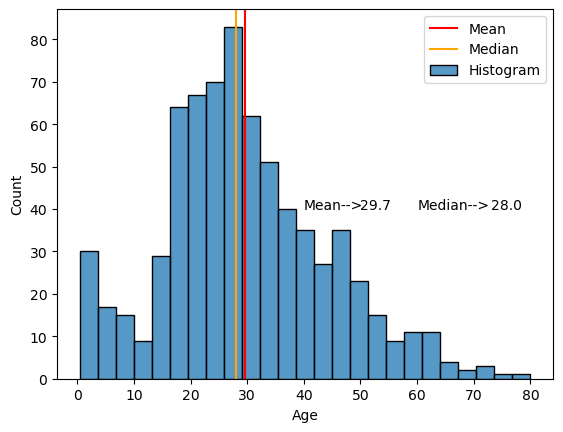

In [77]:
## Histogram of Age column using bins=25
sns.histplot(data = df_titanic , x = 'Age' , bins = 25 ,label = 'Histogram' )
plt.text(x = 40 ,y = 40 ,s ='Mean-->')
plt.text(x = 50 ,y = 40 ,s =np.round(df_titanic['Age'].mean(),2))

plt.text(x = 60 ,y = 40 ,s ='Median-->')
plt.text(x = 73 ,y = 40 ,s =np.round(df_titanic['Age'].median(),2))

plt.axvline(x = 29.64 ,color = 'r' ,label = 'Mean')
plt.axvline(x = 28.0 ,color = 'orange' , label = 'Median')
plt.legend()
plt.show()

### `(Age) Column contains null values, Let's impute using (median)`

In [78]:
## Imputing the DF for Age column using median 
df_titanic['Age'] = df_titanic['Age'].fillna(value = df_titanic['Age'].median())
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


''

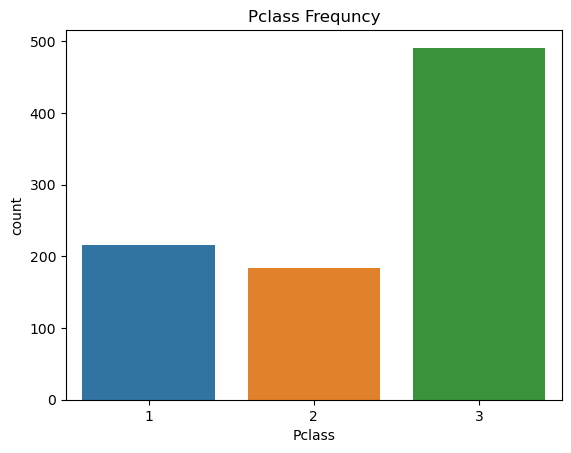

In [79]:
## for Pclass column 
sns.countplot(data = df_titanic , x = df_titanic['Pclass'])
plt.title('Pclass Frequncy')

;

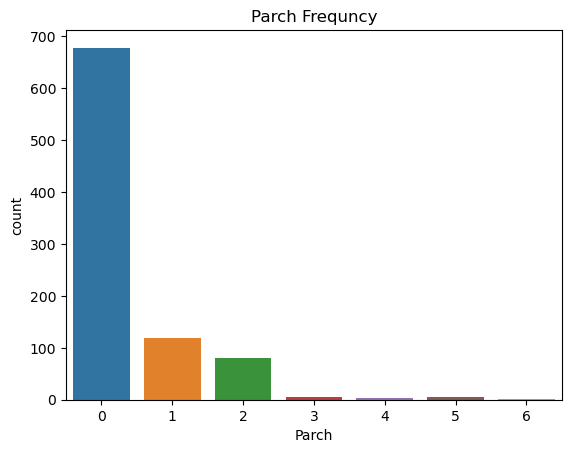

In [80]:
## for Parch column 
sns.countplot(data = df_titanic , x = df_titanic['Parch'])
plt.title('Parch Frequncy');

### `Let's go further by creating (bivariate visualization, multivariate visualization)`


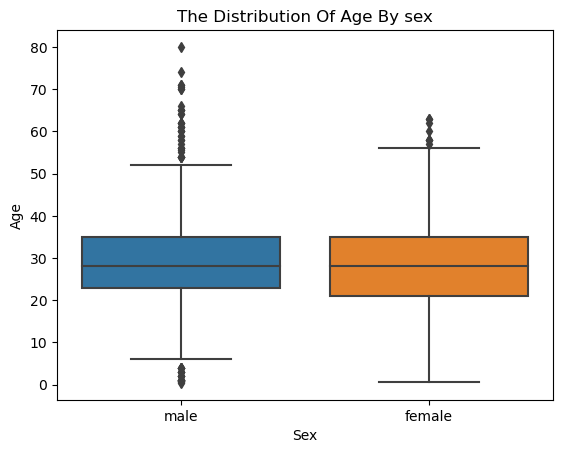

In [81]:
## Create boxplot for Age column, taking into consideration Sex
sns.boxplot(data = df_titanic , x = 'Sex' , y = 'Age')
plt.title('The Distribution Of Age By sex');

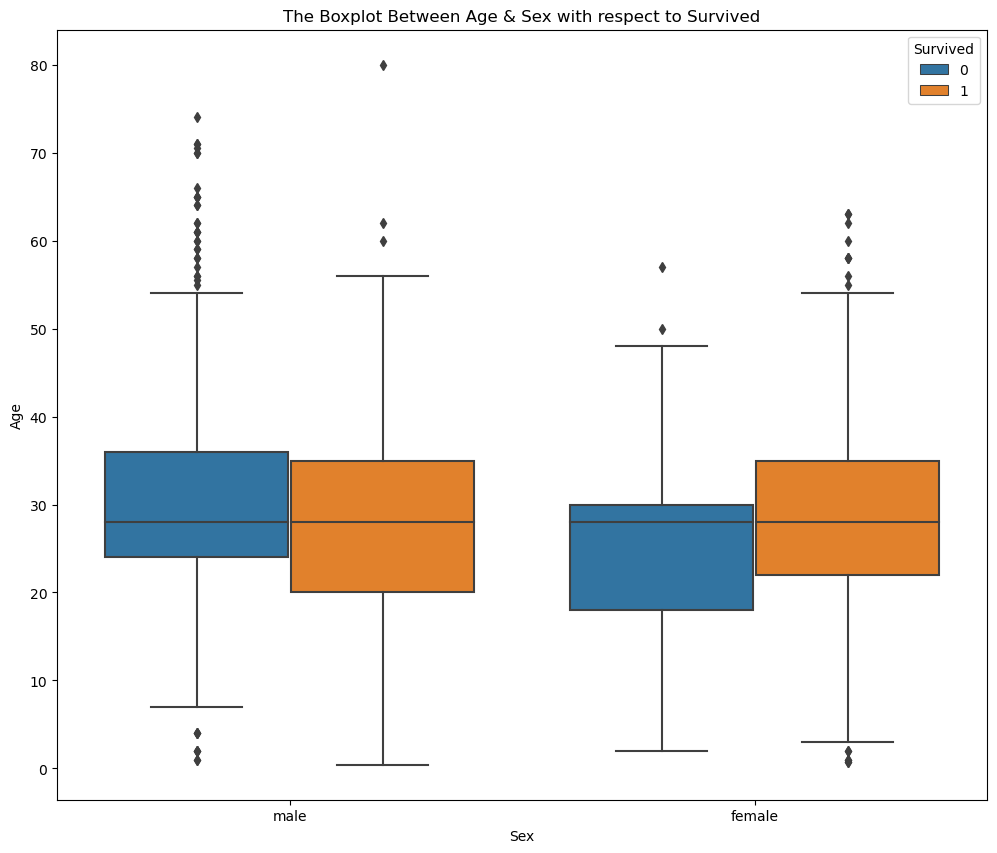

In [82]:
## Create boxplot for Age column, taking into consideration Sex , and also (Survived) as hue .
plt.figure(figsize=(12,10))
sns.boxplot(data = df_titanic , x = 'Sex' , y = 'Age' ,hue = 'Survived')
plt.title('The Boxplot Between Age & Sex with respect to Survived');

## `Shuffling the Data`

In [83]:
df_titanic = shuffle(df_titanic , random_state= 12)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
456,0,1,male,65.0,0,0
351,0,1,male,28.0,0,0
173,0,3,male,21.0,0,0
671,0,1,male,31.0,1,0
836,0,3,male,21.0,0,0


### `Slice the DF into two subsets`
* `One of these subset is containing only (Survived) Column, with variable name (y_train)`
* `The other one contains the last DF (df_titanic) with the last processing and without column (Survived), with variable name (X_train)`

In [84]:
## Getting only the (Survived) Column --> Assignning the variable name to be (y_train)
y_train = df_titanic['Survived']
X_train = df_titanic.drop(columns='Survived')

In [85]:
## Getting the DF without (Survived) Column, --> Assignning the variable name to be (X_train)
X_train.head()


,Pclass,Sex,Age,SibSp,Parch
456,1,male,65.0,0,0
351,1,male,28.0,0,0
173,3,male,21.0,0,0
671,1,male,31.0,1,0
836,3,male,21.0,0,0


### `We want to map the Categotical Columns to be numerical`
* `Example : for (Sex) column, we want 'male' to be 1, 'female' to be 0`
* `for (Embarked) column, we want S to be 0, C to be 1, Q to be 2`

In [86]:
## Creating the two dictionary, each key with its value we want to replace with
sex_dict = {'male': 1, 'female': 0}
embarked_dict = {'S': 0, 'C': 1, 'Q': 2}

In [87]:
## mapping function with required dictionary
## we override the old column with the new column which is mapped
X_train['Sex'] = X_train['Sex'].map(sex_dict)   

X_train.head() #Exactly what I want

,Pclass,Sex,Age,SibSp,Parch
456,1,1,65.0,0,0
351,1,1,28.0,0,0
173,3,1,21.0,0,0
671,1,1,31.0,1,0
836,3,1,21.0,0,0


X_train['Embarked'] = X_train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2} )
X_train.head()

In [88]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch
456,1,1,65.0,0,0
351,1,1,28.0,0,0
173,3,1,21.0,0,0
671,1,1,31.0,1,0
836,3,1,21.0,0,0


In [89]:
y_train.head()

456    0
351    0
173    0
671    0
836    0
Name: Survived, dtype: int64

In [90]:
std = StandardScaler()
X_train_sta = std.fit_transform(X_train)

# ` Splitting Data into Train , Test and Validation`

In [93]:
X_train_full , X_test , y_train_full , y_test = train_test_split(X_train_sta,y_train ,test_size=0.15)
X_train_final , X_valid , y_train_final , y_valid = train_test_split(X_train_full,y_train_full ,test_size=0.25)

In [94]:
print(len(X_train_final), len(X_valid) , len(X_test))
print(len(y_train_final), len(y_valid) , len(y_test))

567 190 134
567 190 134


# `Machine Learning `

# `KNN `

In [106]:
knn = KNeighborsClassifier(n_neighbors = 6 )
knn.fit(X_train_final , y_train_final)

y_pred_train_knn = knn.predict(X_train_final)
print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_knn))

y_pred_valid_knn = knn.predict(X_valid)
print('Validition Accuracy Score --> ',accuracy_score(y_valid , y_pred_valid_knn))

y_pred_test_knn = knn.predict(X_test)
print('Test Accuracy Score --> ',accuracy_score(y_test , y_pred_test_knn))

Train Accuracy Score -->  0.8253968253968254
Validition Accuracy Score -->  0.8631578947368421
Test Accuracy Score -->  0.8656716417910447


# `Descion Tree`

In [107]:
dsc = DecisionTreeClassifier(criterion='gini'  ,min_samples_split= 10
                             , min_samples_leaf = 14 , random_state = 12   )
dsc.fit(X_train_final , y_train_final)

y_pred_train_dsc = dsc.predict(X_train_final)
print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_dsc))

y_pred_valid_dsc = dsc.predict(X_valid)
print('Validition Accuracy Score --> ',accuracy_score(y_valid , y_pred_valid_dsc))

y_pred_test_dsc = dsc.predict(X_test)
print('Test Accuracy Score --> ',accuracy_score(y_test , y_pred_test_dsc))

Train Accuracy Score -->  0.8077601410934744
Validition Accuracy Score -->  0.8315789473684211
Test Accuracy Score -->  0.8507462686567164


In [32]:
y_pred_tree = cross_val_predict(estimator=dsc, X=X_train_final, y=y_train_final, cv=5, n_jobs=-1, method='predict' )
print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_tree))

Train Accuracy Score -->  0.8148148148148148


# `SVM` 

In [33]:
svm = SVC(C=1.0, kernel='linear', degree = 9, tol= 0.000001 , random_state= 12 ,max_iter=-1)
svm.fit(X_train_final , y_train_final)

y_pred_train_svm = svm.predict(X_train_final)
print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_svm))

y_pred_valid_svm = svm.predict(X_valid)
print('Validition Accuracy Score --> ',accuracy_score(y_valid , y_pred_valid_svm))

y_pred_test_svm = svm.predict(X_test)
print('Test Accuracy Score --> ',accuracy_score(y_test , y_pred_test_svm))

Train Accuracy Score -->  0.8112874779541446
Validition Accuracy Score -->  0.7473684210526316
Test Accuracy Score -->  0.7388059701492538


# `Logistic Regression`

In [148]:
vtc = VotingClassifier(estimators=[('clf' ,clf) ,('clff' ,clff),('clfff' ,clfff),('clffff' ,clffff),('xg',xgb_clf),('ada',ada)] , voting='hard')
vtc.fit(X_train_final , y_train_final)

y_pred_train_vtc = vtc.predict(X_train_final)
y_pred_valid_vtc = vtc.predict(X_valid)
y_pred_test_vtc = vtc.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_vtc))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_vtc))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_vtc))



C:\Users\Osama Sabry\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy Score -->  0.9171075837742504
Valid Accuracy Score --> 0.8473684210526315
Test Accuracy Score --> 0.881578947368421


# `RandomForestClassifier`

In [111]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=50, max_leaf_nodes=70, 
                                    criterion='entropy', max_features=1.0, max_samples=0.7 , random_state=12)
clf.fit(X_train_final, y_train_final)

y_pred_train_clf = clf.predict(X_train_final)
y_pred_valid_clf = clf.predict(X_valid)
y_pred_test_clf = clf.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_clf))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_clf))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_clf))


Train Accuracy Score -->  0.9135802469135802
Valid Accuracy Score --> 0.8473684210526315
Test Accuracy Score --> 0.881578947368421


In [112]:
clff = RandomForestClassifier(n_estimators=1000, 
                                    criterion='gini', max_features=1.0, max_samples=0.7 , random_state=12)
clff.fit(X_train_final, y_train_final)

y_pred_train_clf = clff.predict(X_train_final)
y_pred_valid_clf = clff.predict(X_valid)
y_pred_test_clf = clff.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_clf))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_clf))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_clf))


Train Accuracy Score -->  0.9171075837742504
Valid Accuracy Score --> 0.8421052631578947
Test Accuracy Score --> 0.875


In [113]:
clfff = RandomForestClassifier(n_estimators=1000,  
                                    criterion='log_loss', max_features=1.0, max_samples=0.7 , random_state=12)
clfff.fit(X_train_final, y_train_final)

y_pred_train_clf = clfff.predict(X_train_final)
y_pred_valid_clf = clfff.predict(X_valid)
y_pred_test_clf = clfff.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_clf))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_clf))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_clf))


Train Accuracy Score -->  0.9171075837742504
Valid Accuracy Score --> 0.8473684210526315
Test Accuracy Score --> 0.881578947368421


In [114]:
clffff = RandomForestClassifier(n_estimators=10000,
                                    criterion='entropy', max_features=1.0, max_samples=0.7 , random_state=12)
clffff.fit(X_train_final, y_train_final)

y_pred_train_clf = clffff.predict(X_train_final)
y_pred_valid_clf = clffff.predict(X_valid)
y_pred_test_clf = clffff.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_clf))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_clf))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_clf))


Train Accuracy Score -->  0.9206349206349206
Valid Accuracy Score --> 0.8473684210526315
Test Accuracy Score --> 0.8881578947368421


# `AdaBoost`

In [116]:
ada  = AdaBoostClassifier(n_estimators=8,estimator=dsc,
    learning_rate=1)
ada.fit(X_train_final, y_train_final)
y_pred_train_ada = ada.predict(X_train_final)
y_pred_valid_ada = ada.predict(X_valid)
y_pred_test_ada = ada.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_ada))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_ada))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_ada))


Train Accuracy Score -->  0.8783068783068783
Valid Accuracy Score --> 0.8526315789473684
Test Accuracy Score --> 0.868421052631579


# `XGBoost`

In [117]:
xgb_clf = xgb.XGBClassifier(   
                            learning_rate=0.01,           
                            n_estimators=5000,             
                            use_label_encoder=False,)    
xgb_clf.fit(X_train_final, y_train_final)

C:\Users\Osama Sabry\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:39:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
y_pred_train_xgb = xgb_clf.predict(X_train_final)
y_pred_valid_xgb = xgb_clf.predict(X_valid)
y_pred_test_xgb = xgb_clf.predict(X_test)

print('Train Accuracy Score --> ',accuracy_score(y_train_final , y_pred_train_xgb))
print('Valid Accuracy Score -->',accuracy_score(y_valid , y_pred_valid_xgb))
print('Test Accuracy Score -->',accuracy_score(y_test , y_pred_test_xgb))


Train Accuracy Score -->  0.9153439153439153
Valid Accuracy Score --> 0.8631578947368421
Test Accuracy Score --> 0.9013157894736842


# Done!